# Assignment on Classification

Do the following in the iris dataset

1. Read the dataset to python environment

2. Do the necessary pre-processing steps

3. Find out which classification model gives the best result (also do random 
forest algorithm)

In [1]:
# importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# Read the data in to python environment
data = pd.read_excel('/Users/geethuvishnu/Desktop/DATASETS/iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data['Classification'].nunique()

3

In [8]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

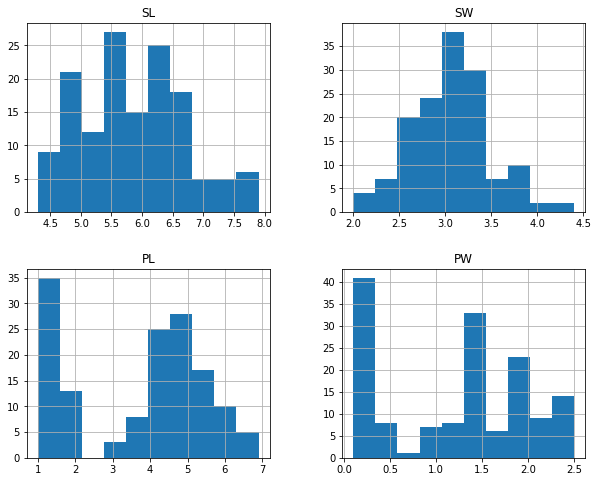

In [10]:
# cheching the skewness of the data
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,8))
plt.show()

In [11]:
# filling the missing values using simple imputer
from sklearn.impute import SimpleImputer

In [12]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [13]:
num_cols = data[['SL', 'SW', 'PL']]

In [14]:
num_cols.isna().sum()

SL    7
SW    6
PL    6
dtype: int64

In [15]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean') # creating instance of Simple imputer
num_cols = imputer.fit_transform(num_cols)

In [16]:
type(num_cols)

numpy.ndarray

In [17]:
num_cols = pd.DataFrame(num_cols,columns=['SL', 'SW', 'PL'])  # converting num_cols(array) to a dataframe

In [18]:
type(num_cols)

pandas.core.frame.DataFrame

In [19]:
num_cols.isna().sum()

SL    0
SW    0
PL    0
dtype: int64

In [20]:
data1 = data.drop(['SL', 'SW', 'PL'],axis=1)

In [21]:
data1.head()

,PW,Classification
0,0.2,Iris-setosa
1,0.2,Iris-setosa
2,0.2,Iris-setosa
3,0.2,Iris-setosa
4,0.2,Iris-setosa


In [22]:
num_cols.head()

,SL,SW,PL
0,5.100000,3.5,1.4
1,4.900000,3.0,1.4
2,5.855944,3.2,1.3
3,4.600000,3.1,1.5
4,5.000000,3.6,1.4


In [23]:
data1 = pd.concat([num_cols,data1],axis=1)  # concat data1 and num_cols and assigned to data1

In [24]:
data1.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [25]:
data1.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [26]:
# checking for outliers

<function matplotlib.pyplot.show(close=None, block=None)>

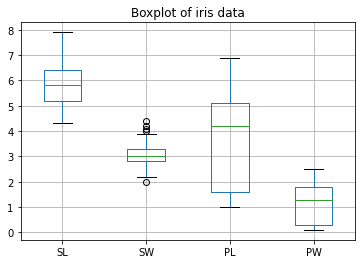

In [27]:
data1.boxplot()
plt.title("Boxplot of iris data")
plt.show

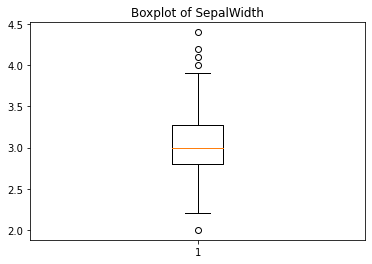

In [28]:
plt.boxplot(data1['SW'])
plt.title("Boxplot of SepalWidth")
plt.show()

In [29]:
# Removing the outliers from data1

In [30]:
Q1 = np.percentile(data1['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data1['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data1['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [31]:
data1['SW'].median() #Finding median

3.0

In [32]:
IQR = Q3-Q1  # Inter Quartile Range
print(IQR)

0.4500000000000002


In [33]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [34]:
outliers = []
for i in data1['SW']:
    if(i<low_lim) or (i>up_lim):
        outliers.append(i)

In [35]:
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [36]:
# Checking index of outliers
indx1 = data1['SW']>up_lim
data1.loc[indx1].index


Int64Index([14, 15, 32, 33], dtype='int64')

In [37]:
data1= data1.drop([14, 15, 32, 33]) # dropping rows with outliers from data1

In [38]:
data1.shape

(146, 5)

In [39]:
indx2 = data1['SW']<low_lim
data1.loc[indx2].index


Int64Index([60], dtype='int64')

In [40]:
data1 = data1.drop([60])      # dropping rows with outliers from data1

In [41]:
data1.shape

(145, 5)

In [42]:
data1.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


# Label Encoding

In [43]:
data1['Classification'].nunique()

3

In [44]:
data1['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [45]:
label_encoder = preprocessing.LabelEncoder()
data1['Classification'] = label_encoder.fit_transform(data1['Classification'])

In [46]:
data1.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [47]:
data1['Classification'].unique()

array([0, 1, 2])

# Model 1 : (k-NN Model)

In [48]:
x = data1.drop(['Classification'],axis=1)
y = data1['Classification']   # Target

In [49]:
# Splitting data for training and testing

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

 k-NN Model

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [67]:
metric_k = []
neighbors = range(3,25)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(x_train,y_train)
    y_pred_KNN = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_KNN) 
    metric_k.append(acc)


In [68]:
metric_k

[0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8918918918918919,
 0.8378378378378378,
 0.918918918918919,
 0.8648648648648649,
 0.918918918918919,
 0.8648648648648649,
 0.8648648648648649,
 0.8648648648648649,
 0.918918918918919,
 0.8648648648648649,
 0.8648648648648649,
 0.8378378378378378,
 0.8648648648648649,
 0.8648648648648649,
 0.8648648648648649,
 0.8648648648648649,
 0.8918918918918919,
 0.8648648648648649]

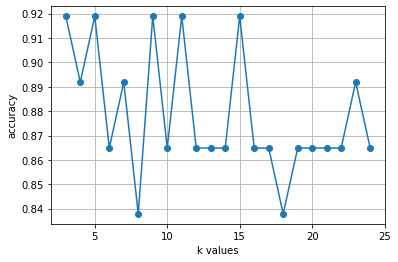

In [69]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.grid()

In [70]:
classifier = KNeighborsClassifier(n_neighbors=15)
classifier = classifier.fit(x_train,y_train)
y_pred_KNN = classifier.predict(x_test)

In [71]:
accuracy_score(y_test,y_pred_KNN)

0.918918918918919

In [72]:
confusion_matrix(y_test,y_pred_KNN)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]])

# Model 2(SVM Kernel)

In [73]:
data1.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [74]:
from sklearn.svm import SVC

In [75]:
clf_svm = SVC(kernel='linear')
clf_svm = clf_svm.fit(x_train,y_train)
y_pred_svm = clf_svm.predict(x_test)

In [76]:
confusion_matrix(y_test,y_pred_svm)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]])

In [77]:
accuracy_score(y_test,y_pred_svm)

0.918918918918919

Model_1 and Model_2 has same accuracy

In [78]:
clf_svm2 = SVC(kernel='rbf')
clf_svm2 = clf_svm2.fit(x_train,y_train)
y_pred_svm2 = clf_svm2.predict(x_test)   

In [79]:
confusion_matrix(y_test,y_pred_svm2)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  3, 11]])

In [80]:
accuracy_score(y_test,y_pred_svm2)

0.8648648648648649

Here the missclassification increased hence efficiency decreased

# Model_2(1) (Min_Max Scaling_SVM Model)

In [81]:
x.head()

,SL,SW,PL,PW
0,5.100000,3.5,1.4,0.2
1,4.900000,3.0,1.4,0.2
2,5.855944,3.2,1.3,0.2
3,4.600000,3.1,1.5,0.2
4,5.000000,3.6,1.4,0.2


In [82]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
x = min_max_scaler.fit_transform(x)

In [83]:
x = pd.DataFrame(x,columns=['SL','SW','PL','PW'])

In [84]:
x.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,0.436191,0.485581,0.478477,0.469540
std,0.226858,0.220209,0.289681,0.315925
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.352941,0.101695,0.083333
50%,0.432207,0.470588,0.559322,0.500000
75%,0.583333,0.588235,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [90]:
clf_svm2 = SVC(kernel='rbf')
clf_svm2 = clf_svm2.fit(x_train,y_train)
y_pred_svm2 = clf_svm2.predict(x_test)   

In [91]:
confusion_matrix(y_test,y_pred_svm2)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  3, 11]])

In [92]:
accuracy_score(y_test,y_pred_svm2)

0.8648648648648649

 min max scaling of data has no effect on model3

# Model_2(Standard Scaling)

In [93]:
data1.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [94]:
x = data1.drop(['Classification'],axis=1)
y = data1['Classification']   # Target

In [95]:
std_scl = preprocessing.StandardScaler()

In [96]:
x = std_scl.fit_transform(x)

In [97]:
x = pd.DataFrame(x,columns=['SL','SW','PL','PW'])

In [98]:
x.head()

,SL,SW,PL,PW
0,-0.946450,1.271938,-1.422617,-1.359047
1,-1.192190,-0.068322,-1.422617,-1.359047
2,-0.017623,0.467782,-1.481330,-1.359047
3,-1.560800,0.199730,-1.363904,-1.359047
4,-1.069320,1.539990,-1.422617,-1.359047


In [99]:
clf_svm5 = SVC(kernel='rbf')
clf_svm5 = clf_svm5.fit(x_train,y_train)
y_pred_svm5 = clf_svm5.predict(x_test)   

In [100]:
confusion_matrix(y_test,y_pred_svm5)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  3, 11]])

In [101]:
accuracy_score(y_test,y_pred_svm5)

0.8648648648648649

In [102]:
clf_svm5 = SVC(kernel='linear')
clf_svm5 = clf_svm5.fit(x_train,y_train)
y_pred_svm5 = clf_svm5.predict(x_test)

In [103]:
confusion_matrix(y_test,y_pred_svm5)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]])

In [104]:
accuracy_score(y_test,y_pred_svm5)

0.918918918918919

Accuracy of Model 3 has increased after standard scaling

# Model 3 (Working of decision tree)

In [105]:
data1.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [106]:
x = data1.drop(["Classification"],axis=1)
y = data['Classification']

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(x_train,y_train)
y_pred_dt = dt_clf.predict(x_test)

In [109]:
confusion_matrix(y_test,y_pred_dt)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]])

In [110]:
accuracy_score(y_test,y_pred_dt)

0.918918918918919

# Model 4 (Random Forest Algorithm)

In [111]:
x = data1.drop(["Classification"],axis=1)
y = data['Classification']

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(x_train,y_train)
y_pred_clf = rf_clf.predict(x_test)

In [114]:
confusion_matrix(y_test,y_pred_clf)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]])

In [115]:
accuracy_score(y_test,y_pred_clf)

0.9459459459459459

Accuracy of model4 has increased to 0.945945 comparing to all the other 3 models.
Hence model created using Random Forest Algorithm can be considered as the best model created.